In [13]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [4]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [5]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.5,
    rotation_range=45
)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
import os

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered/train'),
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [9]:
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered/validation'),
    shuffle=False,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode='binary'
)  

Found 1000 images belonging to 2 classes.


In [10]:
sample_training_images, _ = next(train_data_gen)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

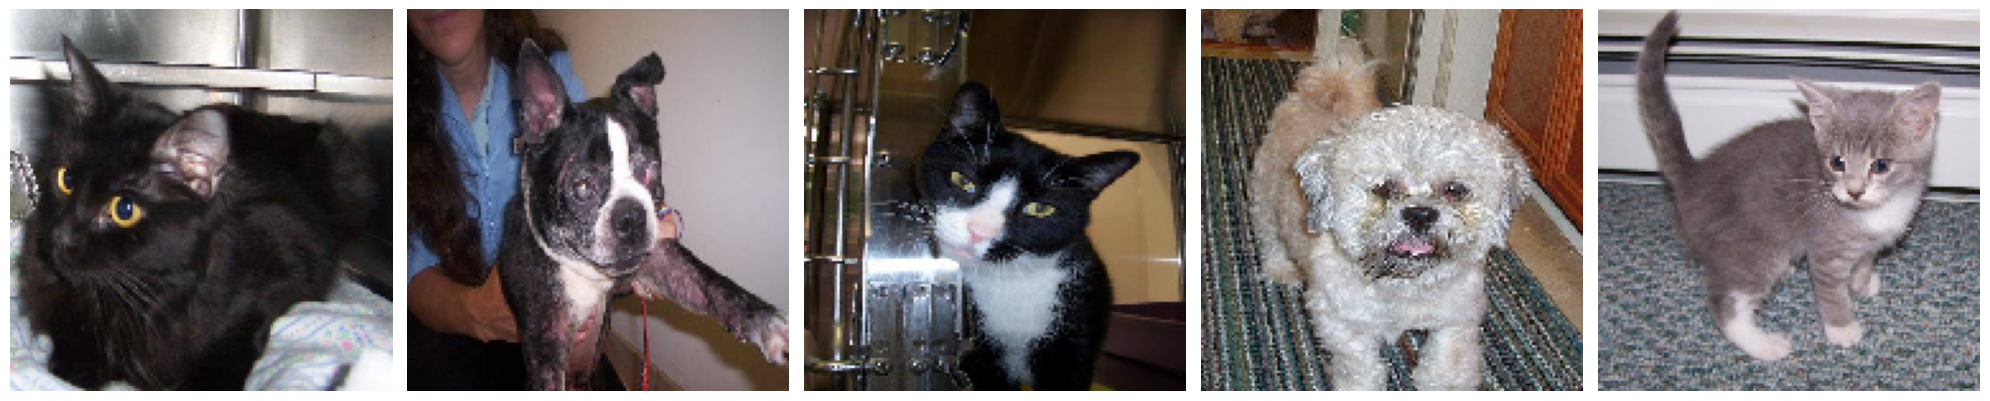

In [14]:
plotImages(sample_training_images[:5])

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(2, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [19]:
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

C:\Users\STA Laptop\AppData\Local\Temp\ipykernel_12584\2853029425.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 107s 5s/step - loss: 0.6905 - accuracy: 0.5290 - val_loss: 0.6758 - val_accuracy: 0.6210
Epoch 2/10
20/20 [==============================] - 94s 5s/step - loss: 0.6791 - accuracy: 0.5800 - val_loss: 0.6785 - val_accuracy: 0.5750
Epoch 3/10
20/20 [==============================] - 96s 5s/step - loss: 0.6639 - accuracy: 0.6040 - val_loss: 0.6227 - val_accuracy: 0.6400
Epoch 4/10
20/20 [==============================] - 87s 4s/step - loss: 0.6084 - accuracy: 0.6565 - val_loss: 0.5772 - val_accuracy: 0.6840
Epoch 5/10
20/20 [==============================] - 89s 4s/step - loss: 0.5607 - accuracy: 0.7125 - val_loss: 0.5574 - val_accuracy: 0.7060
Epoch 6/10
20/20 [==============================] - 87s 4s/step - loss: 0.5311 - accuracy: 0.7415 - val_loss: 0.5676 - val_accuracy: 0.6900
Epoch 7/10
20/20 [==============================] - 92s 5s/step - loss: 0.4999 - accuracy: 0.7585 - val_loss: 0.5616 - val_accuracy: 0.7120
Epoch 8/10
20/20 [=